<a href="https://colab.research.google.com/github/NguyenVy2k1/ols/blob/main/INTERN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KHAI BÁO BIẾN, THƯ VIỆN

In [19]:
import matplotlib.pyplot          as plt
import numpy                      as np
import matplotlib.pyplot          as plt
import numpy                      as np
from keras.preprocessing.image    import load_img
from keras.preprocessing.image    import img_to_array
from keras.models                 import load_model
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 
from tensorflow.keras.optimizers  import SGD

In [3]:
x_train = np.zeros((580,220,220,3))
x_test = np.zeros((63,220,220,3))

KẾT NỐI GOOGLE DRIVE

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


GÁN GIÁ TRỊ CHO Y_TRAIN, Y_TEST

In [5]:
y_train = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

           1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,1,

           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2]

y_test = [0,0,0,0,0,0,0,0,0,0,0,
          1,1,1,1,1,1,1,1,1,1,1,
          2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2,2]

LOAD ẢNH

In [6]:
for i in range(114):
  x_train[i] = load_img('/content/drive/MyDrive/data/train/benign_cases'+ 
                        str(i+1+10) +'.png', target_size=(220,220))
  x_train[i] = img_to_array(x_train[i]) 
  
for i in range(115,205):
  x_train[i] = load_img('/content/drive/MyDrive/data/train/malignant_cases'+ 
                        str(i+1-105) +'.png', target_size=(220,220))
  x_train[i] = img_to_array(x_train[i])  

for i in range(206,578):
  x_train[i] = load_img('/content/drive/MyDrive/data/train/normal_cases'+ 
                        str(i+1+834) +'.png', target_size=(220,220))
  x_train[i] = img_to_array(x_train[i]) 


In [7]:
for i in range(9):
  x_test[i] = load_img('/content/drive/MyDrive/data/test/benign_cases'+ 
                       str(i+1) +'.png', target_size=(220,220))
  x_test[i] = img_to_array(x_test[i]) 

for i in range(10,20) :
  x_test[i] = load_img('/content/drive/MyDrive/data/test/malignant_cases'+ 
                       str(i+1-11) +'.png', target_size=(220,220))
  x_test[i] = img_to_array(x_test[i]) 

for i in range(21,61):
  x_test[i] = load_img('/content/drive/MyDrive/data/test/normal_cases'+ 
                       str(i+1+978) +'.png', target_size=(220,220))
  x_test[i] = img_to_array(x_test[i]) 

In [8]:
x_train = x_train.reshape(580, 220, 220,3)
x_test  = x_test.reshape(63, 220, 220,3)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train/=255
x_test/=255

y_train = np_utils.to_categorical(y_train,3)
y_test  = np_utils.to_categorical(y_test,3)

XÂY DỰNG MODEL

In [9]:
model = Sequential()

model.add(Conv2D(4, (3, 3), activation='relu', 
                             kernel_initializer='he_uniform', 
                             padding='same', input_shape=(220, 220, 3)))
model.add(BatchNormalization())
model.add(Conv2D(4, (3, 3), activation='relu', 
                             kernel_initializer='he_uniform', 
                             padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(8, (3, 3), activation='relu', 
                             kernel_initializer='he_uniform', 
                             padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(8, (3, 3), activation='relu', 
                             kernel_initializer='he_uniform', 
                             padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(16, (3, 3), activation='relu', 
                             kernel_initializer='he_uniform', 
                             padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation='relu', 
                             kernel_initializer='he_uniform', 
                             padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu', 
                             kernel_initializer='he_uniform', 
                             padding='same'))

model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', 
                             kernel_initializer='he_uniform', 
                             padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(64, (3, 3), activation='relu', 
                             kernel_initializer='he_uniform', 
                             padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', 
                             kernel_initializer='he_uniform', 
                             padding='same'))
model.add(BatchNormalization())	
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', 
                             kernel_initializer='he_uniform', 
                             padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', 
                             kernel_initializer='he_uniform', 
                             padding='same'))
model.add(BatchNormalization())	
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', 
                              kernel_initializer='he_uniform', 
                              padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', 
                              kernel_initializer='he_uniform',
                              padding='same'))
model.add(BatchNormalization())	
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu', 
                     kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))	
model.add(Dense(3, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 4)       112       
                                                                 
 batch_normalization (BatchN  (None, 220, 220, 4)      16        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 4)       148       
                                                                 
 batch_normalization_1 (Batc  (None, 220, 220, 4)      16        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 4)      0         
 )                                                               
                                                        

TRAINING

In [10]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['acc'])
history = model.fit(x_train,y_train,epochs=100,batch_size=1,validation_data=(x_test,y_test),verbose=1)

Epoch 1/100
580/580 [==============================] - 19s 11ms/step - loss: 0.9395 - acc: 0.6397 - val_loss: 7.9126 - val_acc: 0.2857
Epoch 2/100
580/580 [==============================] - 6s 10ms/step - loss: 0.9020 - acc: 0.6431 - val_loss: 15.9409 - val_acc: 0.1905
Epoch 3/100
580/580 [==============================] - 6s 10ms/step - loss: 0.9194 - acc: 0.6362 - val_loss: 10.6907 - val_acc: 0.2381
Epoch 4/100
580/580 [==============================] - 6s 10ms/step - loss: 0.9136 - acc: 0.6431 - val_loss: 7.7879 - val_acc: 0.2381
Epoch 5/100
580/580 [==============================] - 6s 11ms/step - loss: 0.9154 - acc: 0.6431 - val_loss: 9.4141 - val_acc: 0.1746
Epoch 6/100
580/580 [==============================] - 7s 11ms/step - loss: 0.9120 - acc: 0.6431 - val_loss: 3.0061 - val_acc: 0.3333
Epoch 7/100
580/580 [==============================] - 6s 10ms/step - loss: 0.9177 - acc: 0.6431 - val_loss: 1.7722 - val_acc: 0.4921
Epoch 8/100
580/580 [==============================] - 6s 1

VẼ ĐỒ THỊ

Test loss: 0.8904635310173035
Test accuracy: 0.6507936716079712


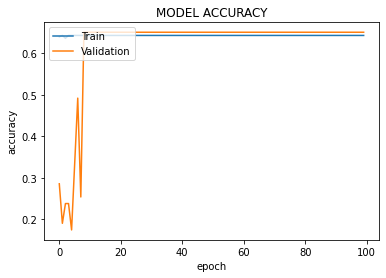

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('MODEL ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show

score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

LƯU MODEL

In [12]:
model.save('Breast_cancer.h5')

Chẩn đoán:  Normal Case


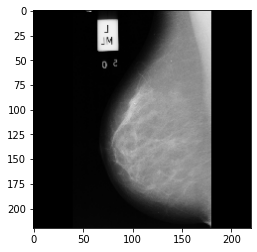

Accuracy:  4.917041561652546e-16 %


In [25]:
img = load_img('/content/drive/MyDrive/data/test/normal_cases1005.png', target_size=(220, 220))
img = img_to_array(img)
img = img.reshape(1, 220, 220, 3)
img = img.astype('float32')
img = img / 255

model = load_model('Breast_cancer.h5')
plt.imshow(img.reshape(220,220,3), cmap='gray')

result = model.predict(img.reshape(1,220,220,3))
if np.argmax(result) == 0:
   i = "Begnign Case"
elif np.argmax(result) == 1:
   i = "Malignant Case"
elif np.argmax(result) == 2:
   i = "Normal Case"
print('Chẩn đoán: ', i)
plt.show()

y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print("Accuracy: ",a, '%')

Chẩn đoán:  Normal Case


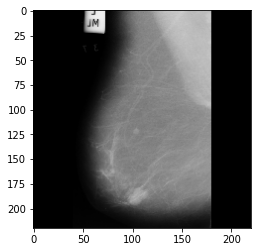

Accuracy:  1.455014392662008e-12 %


In [26]:
img2 = load_img('/content/drive/MyDrive/data/test/benign_cases5.png', target_size=(220, 220))
img2 = img_to_array(img2)
img2 = img2.reshape(1, 220, 220, 3)
img2 = img2.astype('float32')
img2 = img2 / 255

model = load_model('Breast_cancer.h5')
plt.imshow(img2.reshape(220,220,3), cmap='gray')

result = model.predict(img.reshape(1,220,220,3))
if np.argmax(result) == 0:
   i = "Begnign Case"
elif np.argmax(result) == 1:
   i = "Malignant Case"
elif np.argmax(result) == 2:
   i = "Normal Case"
print('Chẩn đoán: ', i)
plt.show()

y_pred = model.predict(img2)
a = y_pred.max()
a = a*100
print("Accuracy: ",a, '%')